# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [2]:
# stundent details example: John S. 9812
#                       student details 1: Itzhak M. 7334
# (if exists)           student details 2: David K. 3590
# (if exists)           student details 3: Taisiya A. 8013
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split # for splitting the data
from collections import Counter # for counting the occurrences of each class
import re # cleans the text so we can see only the words we want to count
import nltk # for natural language processing
from nltk.corpus import stopwords # for removing common words
#vader
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download as nltk_download
from sklearn.feature_extraction.text import CountVectorizer # for multi-gram features
#from wordcloud import WordCloud
import textwrap # for wrapping text in word cloud
from sklearn.preprocessing import MinMaxScaler # for feature scaling
import numpy as np # for numerical operations
#from wordcloud import WordCloud # for generating word clouds


In [4]:
# save the original dataframe
df_raw = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")

# 2) עותק עבודה מלא (לא מוחקים עמודות)
df = df_raw.copy()

In [5]:
# show the first 10 rows of the dataframe
df.head(10)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
5,6,REMINDER FROM O2: To get 2.50 pounds free call...,Spam
6,7,Huh y lei...,Non-Spam
7,8,Why don't you wait 'til at least wednesday to ...,Non-Spam
8,9,Ard 6 like dat lor.,Non-Spam
9,10,Ok lor... Sony ericsson salesman... I ask shuh...,Non-Spam


In [6]:
# Amount of rows and columns
print("shape:", df.shape)

shape: (957, 3)


In [7]:
# Dataset info(datatypes)
print(df.dtypes) 

S. No.           int64
Message_body    object
Label           object
dtype: object


In [8]:
# Identify rows with exact duplicates
print("Exact duplicate rows:", df.duplicated().sum())

Exact duplicate rows: 0


In [9]:
# Identify columns with null values
#df.info()
df.isnull().sum() # Verify no null values remain in the dataframe

S. No.          0
Message_body    0
Label           0
dtype: int64

In [10]:
df["word_count"] = df["Message_body"].apply(lambda x: len(x.split()))
df

,S. No.,Message_body,Label,word_count
0,1,Rofl. Its true to its name,Non-Spam,6
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,26
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,10
3,4,Will ü b going to esplanade fr home?,Non-Spam,8
4,5,This is the 2nd time we have tried 2 contact u...,Spam,30
...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,19
953,954,How much you got for cleaning,Non-Spam,6
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,12
955,956,Wat time ü finish?,Non-Spam,4


In [11]:
# number of / in spam and non-spam messages

# מספר הופעות של סימן /
df["num_slash"] = df["Message_body"].apply(lambda x: x.count("/"))

# חישוב ממוצע עבור Spam
spam_df = df[df["Label"] == "Spam"]
print("ממוצע הופעות '/' בספאם:", spam_df["num_slash"].mean())

# חישוב ממוצע עבור Non-Spam
non_spam_df = df[df["Label"] == "Non-Spam"]
print("ממוצע הופעות '/' בלא ספאם:", non_spam_df["num_slash"].mean())


ממוצע הופעות '/' בספאם: 0.6229508196721312
ממוצע הופעות '/' בלא ספאם: 0.00718562874251497


In [12]:
# number of exclamation marks

df["num_exclaims"] = df["Message_body"].apply(lambda x: x.count("!"))
spam_df = df[df["Label"] == "Spam"]

print("ממוצע סימני קריאה בספאם:", spam_df["num_exclaims"].mean())
Non_spam_df = df[df["Label"] == "Non-Spam"]
print("ממוצע סימני קריאה בלא ספאם:", Non_spam_df["num_exclaims"].mean())

ממוצע סימני קריאה בספאם: 0.680327868852459
ממוצע סימני קריאה בלא ספאם: 0.17005988023952096


In [13]:
# סינון הודעות שבהן מופיע הצירוף "it gt"
mask = df["Message_body"].str.contains(r"\bit gt\b", case=False, na=False)

# הצגת כמה שורות ראשונות
examples = df[mask].head(10)   # אפשר לשנות את 10 לכמה שאתה רוצה

print("מספר הודעות שבהן מופיע הצירוף 'it gt':", mask.sum())
print(examples[["Label", "Message_body"]])

מספר הודעות שבהן מופיע הצירוף 'it gt': 0
Empty DataFrame
Columns: [Label, Message_body]
Index: []


In [ ]:
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP
# WHAT WE NEED TO KEEP

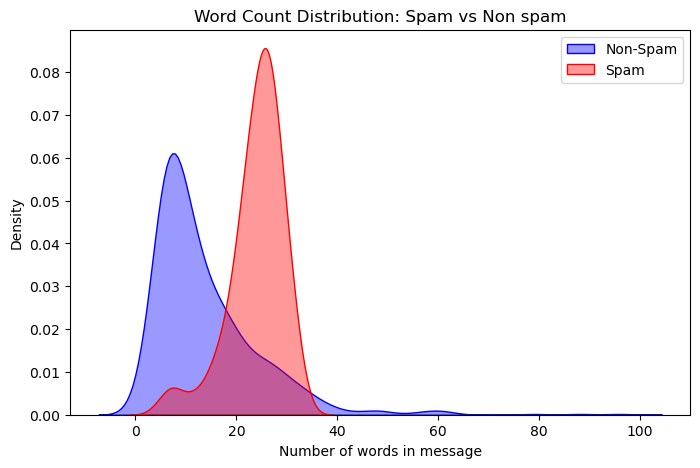

In [15]:
#
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df["Label"]=="Non-Spam"], x="word_count", label="Non-Spam", fill=True, color="blue", alpha=0.4)
sns.kdeplot(data=df[df["Label"]=="Spam"], x="word_count", label="Spam", fill=True, color="red", alpha=0.4)

plt.title("Word Count Distribution: Spam vs Non spam")
plt.xlabel("Number of words in message")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_3068\545938653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Label", y="word_count", palette="Set2")


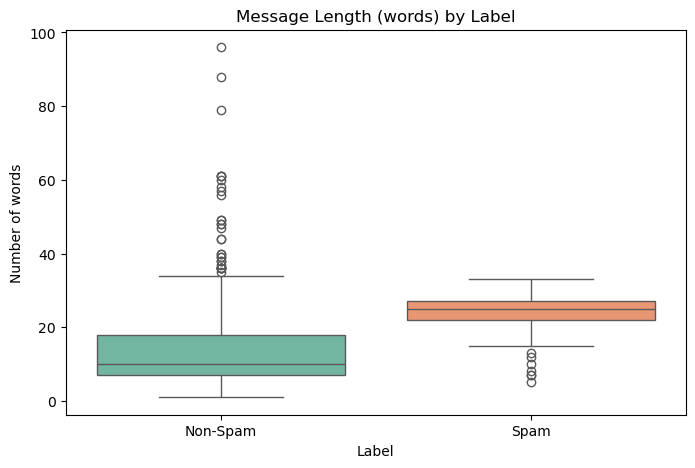

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Label", y="word_count", palette="Set2")
plt.title("Message Length (words) by Label")
plt.xlabel("Label")
plt.ylabel("Number of words")
plt.show()

In [17]:
#import re
# מספר סימני קריאה
df["num_exclaims"] = df["Message_body"].apply(lambda x: x.count("!"))

In [18]:
spam_df = df[df["Label"] == "Spam"]
print("ממוצע סימני קריאה בספאם:", spam_df["num_exclaims"].mean())

ממוצע סימני קריאה בספאם: 0.680327868852459


In [19]:
Non_spam_df = df[df["Label"] == "Non-Spam"]
print("ממוצע סימני קריאה בלא ספאם:", Non_spam_df["num_exclaims"].mean())

ממוצע סימני קריאה בלא ספאם: 0.17005988023952096


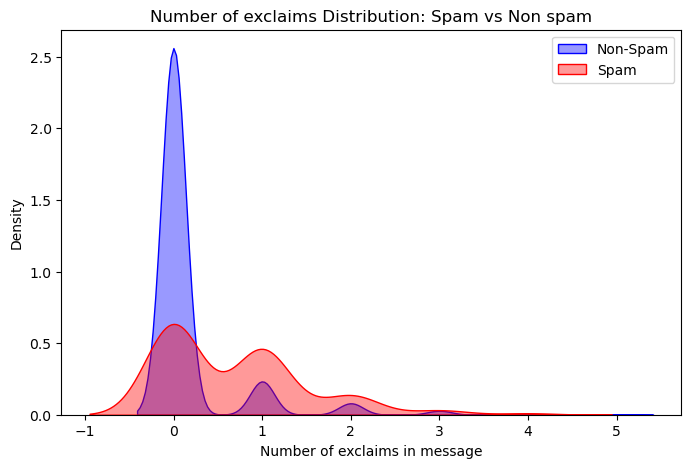

In [20]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df["Label"]=="Non-Spam"], x="num_exclaims", label="Non-Spam", fill=True, color="blue", alpha=0.4)
sns.kdeplot(data=df[df["Label"]=="Spam"], x="num_exclaims", label="Spam", fill=True, color="red", alpha=0.4)

plt.title("Number of exclaims Distribution: Spam vs Non spam")
plt.xlabel("Number of exclaims in message")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_3068\3801378242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Label", y="num_exclaims", palette="Set2")


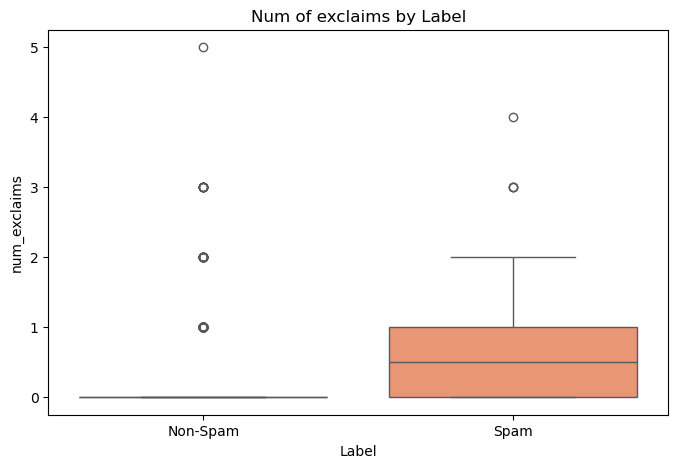

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Label", y="num_exclaims", palette="Set2")
plt.title("Num of exclaims by Label")
plt.xlabel("Label")
plt.ylabel("num_exclaims")
plt.show()

In [22]:
df["num_slash"] = df["Message_body"].apply(lambda x: x.count("/"))

spam_df = df[df["Label"] == "Spam"]
print("ממוצע סלאשים בספאם:", spam_df["num_slash"].mean())

Non_spam_df = df[df["Label"] == "Non-Spam"]
print("ממוצע סלאשים בלא ספאם:", Non_spam_df["num_slash"].mean())

ממוצע סלאשים בספאם: 0.6229508196721312
ממוצע סלאשים בלא ספאם: 0.00718562874251497


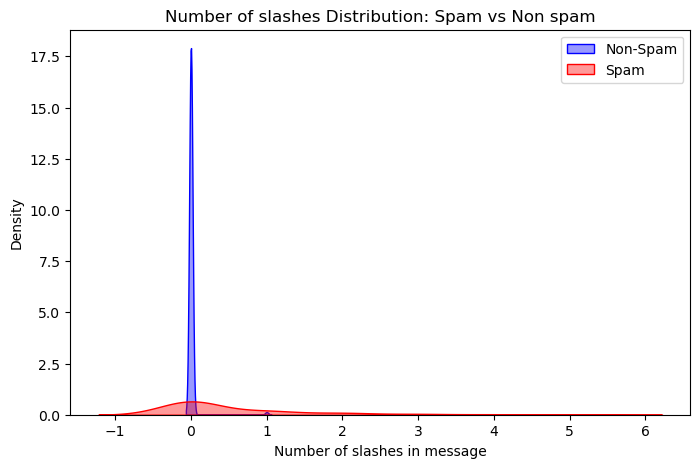

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df["Label"]=="Non-Spam"], x="num_slash", label="Non-Spam", fill=True, color="blue", alpha=0.4)
sns.kdeplot(data=df[df["Label"]=="Spam"], x="num_slash", label="Spam", fill=True, color="red", alpha=0.4)

plt.title("Number of slashes Distribution: Spam vs Non spam")
plt.xlabel("Number of slashes in message")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_3068\1897673116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Label", y="num_slash", palette="Set2")


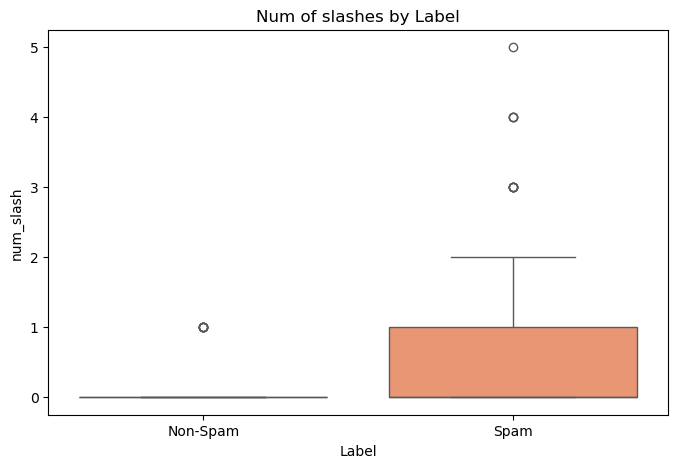

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Label", y="num_slash", palette="Set2")
plt.title("Num of slashes by Label")
plt.xlabel("Label")
plt.ylabel("num_slash")
plt.show()

In [25]:
df["word_count"].value_counts()

word_count
6     79
7     65
5     64
8     56
9     56
10    45
11    36
12    35
13    35
15    32
27    30
4     29
18    28
17    25
25    25
19    22
23    22
22    22
14    21
26    20
21    19
20    19
16    18
28    17
30    17
24    17
3     15
29    11
31    10
33     9
2      9
32     7
1      6
36     6
34     5
61     3
39     2
38     2
44     2
48     2
40     2
49     2
56     1
57     1
88     1
47     1
79     1
96     1
58     1
37     1
35     1
60     1
Name: count, dtype: int64

In [26]:
df["num_exclaims"].value_counts()


num_exclaims
0    797
1    111
2     36
3     11
5      1
4      1
Name: count, dtype: int64

In [27]:
df["num_slash"].value_counts()


num_slash
0    909
1     28
2     11
3      5
4      3
5      1
Name: count, dtype: int64

In [28]:
df["has_number"] = df["Message_body"].apply(lambda x: 1 if re.search(r"\d", x) else 0)

spam_df = df[df["Label"] == "Spam"]
print("ממוצע אם יש מספר בספאם:", spam_df["has_number"].mean())

Non_spam_df = df[df["Label"] == "Non-Spam"]
print("ממוצע אם יש מספר בלא ספאם:", Non_spam_df["has_number"].mean())

ממוצע אם יש מספר בספאם: 0.9426229508196722
ממוצע אם יש מספר בלא ספאם: 0.1592814371257485


In [29]:
# סינון הודעות שמכילות מספרים
# needs make it only show 10 messages
number_messages = df[df["has_number"] == 1]

for msg in number_messages["Message_body"]:
    print(msg)
    print("-----")


This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.
-----
REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode
-----
Ard 6 like dat lor.
-----
Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...
-----
No. I meant the calculation is the same. That  &lt;#&gt; units at  &lt;#&gt; . This school is really expensive. Have you started practicing your accent. Because its important. And have you decided if you are doing 4years of dental school or if you'll just do the nmde exam.
-----
Yeh. Indians was nice. Tho it did kane me off a bit he he. We shud go out 4 a drink sometime soon. Mite hav 2 go 2 da works 4 a laugh soon. Love Pete x x
-----
ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A

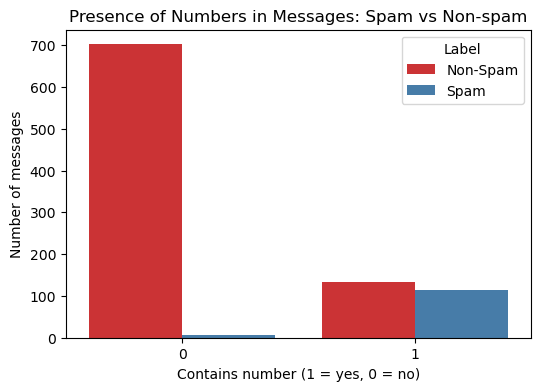

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="has_number", hue="Label", palette="Set1")
plt.title("Presence of Numbers in Messages: Spam vs Non-spam")
plt.xlabel("Contains number (1 = yes, 0 = no)")
plt.ylabel("Number of messages")
plt.show()

            ngram  count_ham  count_spam  ham_vs_spam_ratio
174           . .         11           0               12.0
7175        wan 2          8           0                9.0
2802   call later          7           0                8.0
1910  Sorry, call          6           0                7.0
3375    dont know          6           0                7.0
75    &lt;#&gt; .          4           0                5.0
3027       come n          4           0                5.0
4908   many times          4           0                5.0
6915        u get          4           0                5.0
6973        u wan          4           0                5.0
7191      want go          4           0                5.0
5899   right now.          4           1                2.5
183        . come          3           0                4.0
194   ... *loving          3           0                4.0
382        2 come          3           0                4.0


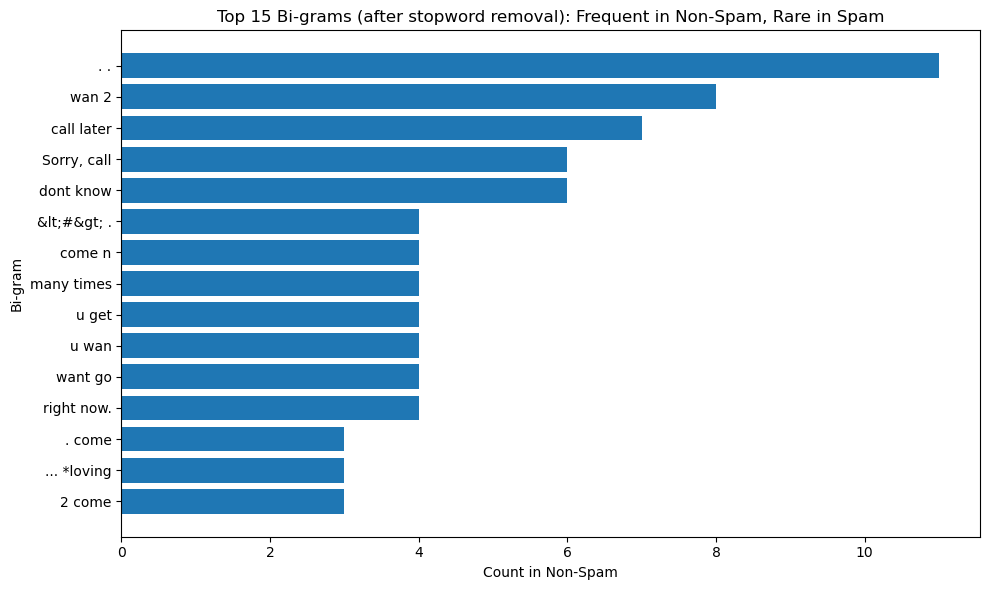

In [31]:
# remove stopwords and find top by-grams frequent in Non-Spam, rare in Spam

# --- שלב 1: הכנת Stopwords באנגלית
stop_words = set(stopwords.words('english'))

# פונקציה להסרת stopwords
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # מפצל לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

# יצירת עמודה חדשה עם טקסט ללא stopwords
df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 2: Tokenizer שמפצל רק לפי רווח (כמו בקוד הקודם)
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)  # מפצל לפי רצפים לא-רווחיים

# CountVectorizer ל-Bi-grams
vec = CountVectorizer(
    ngram_range=(2, 2),
    tokenizer=whitespace_tokenizer,
    token_pattern=None,
    lowercase=False
)

# --- שלב 3: בניית vocab על כל הדאטה (אחרי ניקוי stopwords)
texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה ל-Spam ו-Non-Spam
ham_texts  = df[df["Label"] == "Non-Spam"]["Message_no_stop"].fillna("").astype(str)
spam_texts = df[df["Label"] == "Spam"]["Message_no_stop"].fillna("").astype(str)

X_ham  = vec.transform(ham_texts)
X_spam = vec.transform(spam_texts)

# --- שלב 4: ספירת תדירויות
vocab = vec.get_feature_names_out()
ham_counts  = X_ham.sum(axis=0).A1
spam_counts = X_spam.sum(axis=0).A1

ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})
spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})

# --- שלב 5: איחוד והשוואה
merged = ham_df.merge(spam_df, on="ngram", how="left").fillna(0)
merged["ham_vs_spam_ratio"] = (merged["count_ham"] + 1) / (merged["count_spam"] + 1)

top15_ham_unique = merged.sort_values(
    by=["count_ham", "ham_vs_spam_ratio"],
    ascending=[False, False]
).head(15)

print(top15_ham_unique[["ngram", "count_ham", "count_spam", "ham_vs_spam_ratio"]])

# --- שלב 6: ויזואליזציה
plt.figure(figsize=(10, 6))
plt.barh(top15_ham_unique["ngram"][::-1], top15_ham_unique["count_ham"][::-1])
plt.title("Top 15 Bi-grams (after stopword removal): Frequent in Non-Spam, Rare in Spam")
plt.xlabel("Count in Non-Spam")
plt.ylabel("Bi-gram")
plt.tight_layout()
plt.show()

                  ngram  count_spam  count_ham  spam_vs_ham_ratio
692   Account Statement           8          0                9.0
435        2003 Account           7          0                8.0
1674      PRIVATE! 2003           7          0                8.0
604     800 un-redeemed           6          0                7.0
1307   Identifier Code:           6          0                7.0
5621       points. Call           6          0                7.0
6137          shows 800           6          0                7.0
7561         £1000 cash           6          0                7.0
1699        Please call           5          1                3.0
381             2 claim           4          0                5.0
1046         FRND 62468           4          0                5.0
1283              I. M.           4          0                5.0
1430         M. points.           4          0                5.0
1787              S. I.           4          0                5.0
1829      

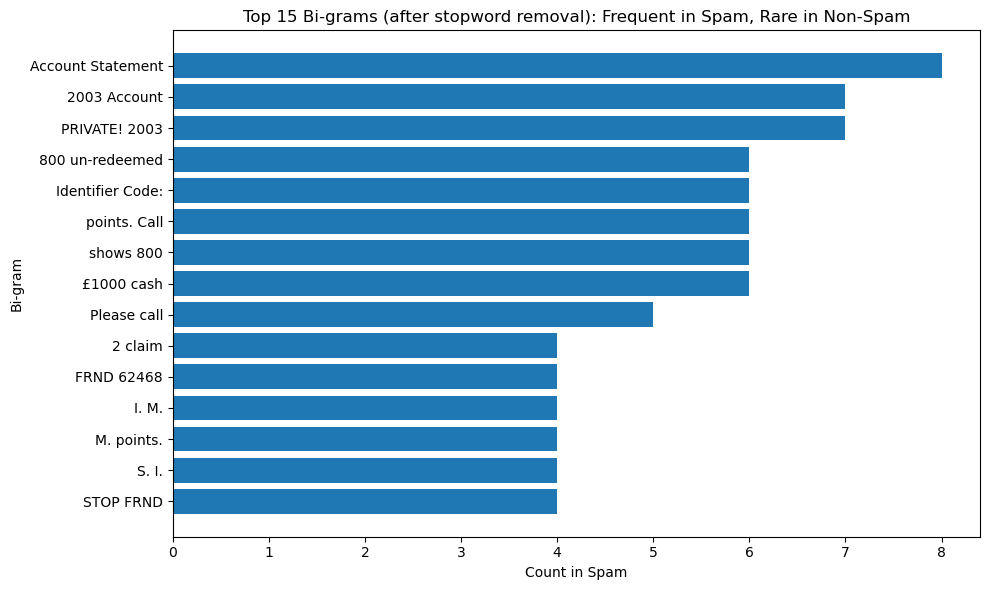

In [32]:
# remove stopwords and find top by-grams frequent in Spam, rare in Non-Spam

# --- שלב 1: הסרת stopwords (דלג אם כבר יש לך df["Message_no_stop"]) ---
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # פיצול לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

if "Message_no_stop" not in df.columns:
    df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 2: Tokenizer שמפצל רק לפי רווח ושומר תווים מיוחדים ---
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)

# --- שלב 3: CountVectorizer ל-Bi-grams על כל הדאטה (כדי לקבע vocab משותף) ---
vec = CountVectorizer(
    ngram_range=(2, 2),
    tokenizer=whitespace_tokenizer,
    token_pattern=None,
    lowercase=False,
    stop_words=None
)

texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה לתת-קבוצות
spam_texts = df[df["Label"] == "Spam"]["Message_no_stop"].fillna("").astype(str)
ham_texts  = df[df["Label"] == "Non-Spam"]["Message_no_stop"].fillna("").astype(str)

X_spam = vec.transform(spam_texts)
X_ham  = vec.transform(ham_texts)

# --- שלב 4: ספירת תדירויות ---
vocab = vec.get_feature_names_out()
spam_counts = X_spam.sum(axis=0).A1
ham_counts  = X_ham.sum(axis=0).A1

spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})
ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})

# --- שלב 5: איחוד והשוואה (נפוץ ב-Spam ונדיר ב-Non-Spam) ---
merged = spam_df.merge(ham_df, on="ngram", how="left").fillna(0)
# יחס עם החלקה +1 כדי למנוע חלוקה ב-0
merged["spam_vs_ham_ratio"] = (merged["count_spam"] + 1) / (merged["count_ham"] + 1)

# דירוג: קודם לפי שכיחות ב-Spam, ואז לפי יחס עדיפות מול Ham
top15_spam_unique = merged.sort_values(
    by=["count_spam", "spam_vs_ham_ratio"],
    ascending=[False, False]
).head(15)

print(top15_spam_unique[["ngram", "count_spam", "count_ham", "spam_vs_ham_ratio"]])

# --- שלב 6: ויזואליזציה ---
plt.figure(figsize=(10, 6))
plt.barh(top15_spam_unique["ngram"][::-1], top15_spam_unique["count_spam"][::-1])
plt.title("Top 15 Bi-grams (after stopword removal): Frequent in Spam, Rare in Non-Spam")
plt.xlabel("Count in Spam")
plt.ylabel("Bi-gram")
plt.tight_layout()
plt.show()

                  ngram  count_ham  count_spam  ham_vs_spam_ratio
159               . . .          5           0                6.0
1834  Sorry, call later          5           0                6.0
1646   Pls send message          3           0                4.0
2006            U wan 2          3           0                4.0
2696    cant pick phone          3           0                4.0
4912      now. Pls send          3           0                4.0
5091   phone right now.          3           0                4.0
5105   pick phone right          3           0                4.0
5430     right now. Pls          3           0                4.0
6393            u wan 2          3           0                4.0
6578         wan 2 come          3           0                4.0
172     . come tomorrow          2           0                3.0
184   ... *loving kiss*          2           0                3.0
644           ? think ?          2           0                3.0
1102  Gud 

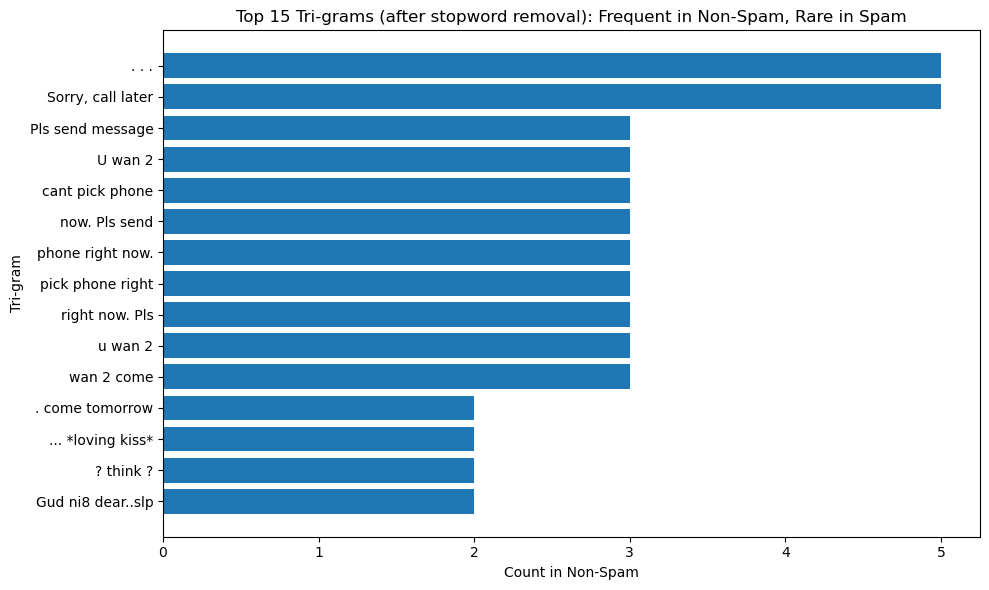

In [33]:
# remvoe stopwords and find top tri-grams

# --- שלב 0: טעינת stopwords (NLTK) ---
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

# --- שלב 1: הסרת stopwords (פיצול לפי רווח בלבד) ---
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # מפצל לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 2: Tokenizer שמפצל רק לפי רווח ושומר תווים מיוחדים בתוך המילה ---
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)  # כל רצף לא-רווח הוא טוקן אחד

# --- שלב 3: CountVectorizer ל-TRI-GRAMS עם פיצול-רווח בלבד ---
vec = CountVectorizer(
    ngram_range=(3, 3),      # TRIGRAMS
    tokenizer=whitespace_tokenizer,
    token_pattern=None,      # מבטל regex דיפולטי
    lowercase=False,         # שמור רישיות (שנה ל-True אם תרצה לנרמל)
    stop_words=None
)

# --- שלב 4: התאמה על כל הדאטה (אחרי הסרת stopwords) ל-vocab משותף ---
texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה לתת-קבוצות
ham_texts  = df[df["Label"] == "Non-Spam"]["Message_no_stop"].fillna("").astype(str)
spam_texts = df[df["Label"] == "Spam"]["Message_no_stop"].fillna("").astype(str)

X_ham  = vec.transform(ham_texts)
X_spam = vec.transform(spam_texts)

# --- שלב 5: ספירת תדירויות ---
vocab = vec.get_feature_names_out()
ham_counts  = X_ham.sum(axis=0).A1
spam_counts = X_spam.sum(axis=0).A1

ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})
spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})

# --- שלב 6: איחוד והשוואה (נפוץ ב-Non-Spam ונדיר ב-Spam) ---
merged = ham_df.merge(spam_df, on="ngram", how="left").fillna(0)
merged["ham_vs_spam_ratio"] = (merged["count_ham"] + 1) / (merged["count_spam"] + 1)

top15_ham_unique_tri = merged.sort_values(
    by=["count_ham", "ham_vs_spam_ratio"],
    ascending=[False, False]
).head(15)

print(top15_ham_unique_tri[["ngram", "count_ham", "count_spam", "ham_vs_spam_ratio"]])

# --- שלב 7: ויזואליזציה ---
plt.figure(figsize=(10, 6))
plt.barh(top15_ham_unique_tri["ngram"][::-1], top15_ham_unique_tri["count_ham"][::-1])
plt.title("Top 15 Tri-grams (after stopword removal): Frequent in Non-Spam, Rare in Spam")
plt.xlabel("Count in Non-Spam")
plt.ylabel("Tri-gram")
plt.tight_layout()
plt.show()

                        ngram  count_spam  count_ham  spam_vs_ham_ratio
411    2003 Account Statement           7          0                8.0
1600    PRIVATE! 2003 Account           7          0                8.0
5645    shows 800 un-redeemed           6          0                7.0
576        800 un-redeemed S.           4          0                5.0
663   Account Statement shows           4          0                5.0
1215            I. M. points.           4          0                5.0
1361          M. points. Call           4          0                5.0
1715                 S. I. M.           4          0                5.0
1755          STOP FRND 62468           4          0                5.0
1758          STOP? Send STOP           4          0                5.0
1786           Send STOP FRND           4          0                5.0
1853      Statement shows 800           4          0                5.0
4083   inviting friend. Reply           4          0            

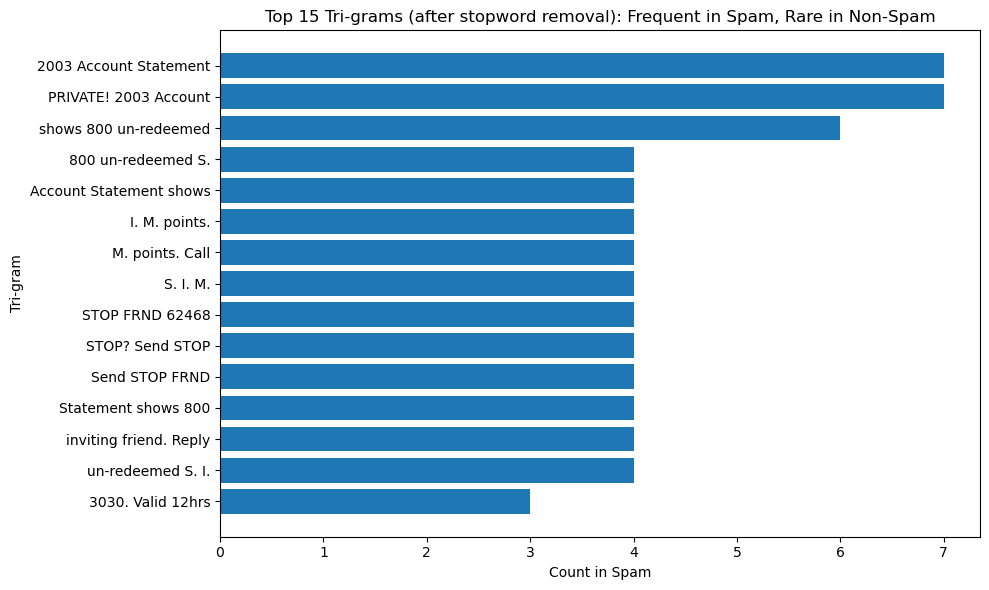

In [34]:
# remove stopwords and find top tri-grams frequent in Spam, rare in Non-Spam

# --- שלב 0: טעינת stopwords (NLTK) ---
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

# --- שלב 1: הסרת stopwords (פיצול לפי רווח בלבד) ---
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # מפצל לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

if "Message_no_stop" not in df.columns:
    df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 2: Tokenizer שמפצל רק לפי רווח ושומר תווים מיוחדים בתוך המילה ---
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)  # כל רצף לא-רווח הוא טוקן אחד

# --- שלב 3: CountVectorizer ל-TRI-GRAMS על כל הדאטה (כדי לקבע vocab משותף) ---
vec = CountVectorizer(
    ngram_range=(3, 3),      # TRI-GRAMS
    tokenizer=whitespace_tokenizer,
    token_pattern=None,      # מבטל regex דיפולטי
    lowercase=False,         # שנה ל-True אם תרצה לנרמל רישיות
    stop_words=None
)

texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה לתת-קבוצות
spam_texts = df[df["Label"] == "Spam"]["Message_no_stop"].fillna("").astype(str)
ham_texts  = df[df["Label"] == "Non-Spam"]["Message_no_stop"].fillna("").astype(str)

X_spam = vec.transform(spam_texts)
X_ham  = vec.transform(ham_texts)

# --- שלב 4: ספירת תדירויות ---
vocab = vec.get_feature_names_out()
spam_counts = X_spam.sum(axis=0).A1
ham_counts  = X_ham.sum(axis=0).A1

spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})
ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})

# --- שלב 5: איחוד והשוואה (נפוץ ב-Spam ונדיר ב-Non-Spam) ---
merged = spam_df.merge(ham_df, on="ngram", how="left").fillna(0)
# יחס עם החלקה +1 כדי למנוע חלוקה ב-0
merged["spam_vs_ham_ratio"] = (merged["count_spam"] + 1) / (merged["count_ham"] + 1)

# דירוג: קודם לפי שכיחות ב-Spam, ואז לפי יחס עדיפות מול Ham
top15_spam_unique_tri = merged.sort_values(
    by=["count_spam", "spam_vs_ham_ratio"],
    ascending=[False, False]
).head(15)

print(top15_spam_unique_tri[["ngram", "count_spam", "count_ham", "spam_vs_ham_ratio"]])

# --- שלב 6: ויזואליזציה ---
plt.figure(figsize=(10, 6))
plt.barh(top15_spam_unique_tri["ngram"][::-1], top15_spam_unique_tri["count_spam"][::-1])
plt.title("Top 15 Tri-grams (after stopword removal): Frequent in Spam, Rare in Non-Spam")
plt.xlabel("Count in Spam")
plt.ylabel("Tri-gram")
plt.tight_layout()
plt.show()

                                              ngram  count_ham  count_spam  \
2429                          cant pick phone right          3           0   
4360                          now. Pls send message          3           0   
4505                           phone right now. Pls          3           0   
4517                          pick phone right now.          3           0   
4811                            right now. Pls send          3           0   
5636                                   u wan 2 come          3           0   
998                    Gud ni8 dear..slp well..take          2           0   
1374                                   Oh k. . come          2           0   
2289                            bottle wine keep us          2           0   
2427                     cant handle malaria. would          2           0   
2506                  children cant handle malaria.          2           0   
2744  dear..slp well..take care..swt dreams..Muah..          2  

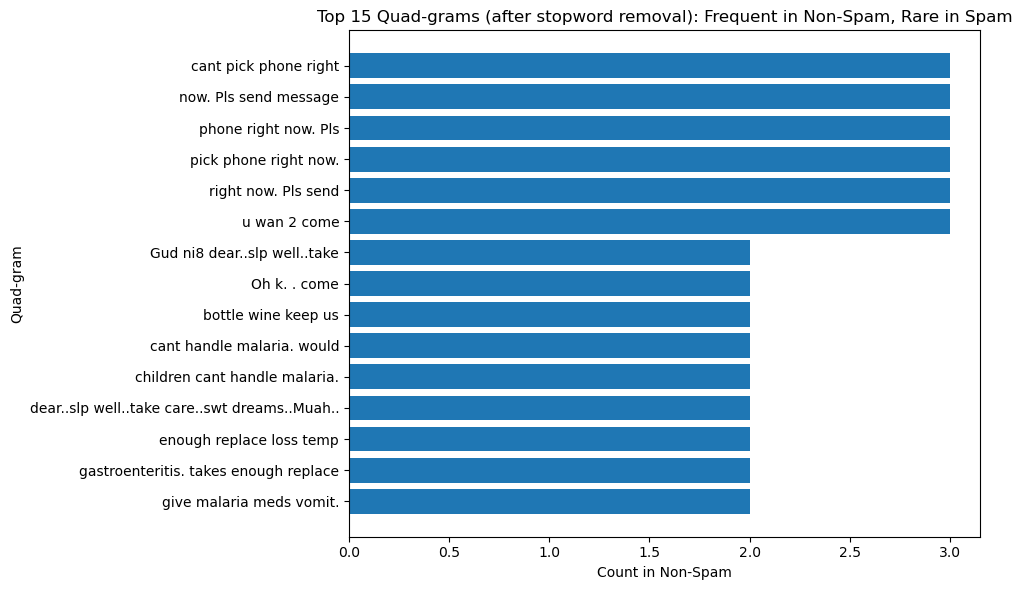

In [35]:
# remove stopwords and find top quad-grams frequent in Non-Spam, rare in Spam

# --- שלב 0: טעינת stopwords (NLTK) ---
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

# --- שלב 1: הסרת stopwords (פיצול לפי רווח בלבד) ---
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # פיצול לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 2: Tokenizer ששומר תווים מיוחדים ומפצל רק ברווח ---
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)  # כל רצף לא-רווח הוא טוקן אחד

# --- שלב 3: CountVectorizer ל-QUAD-GRAMS (4-grams) ---
vec = CountVectorizer(
    ngram_range=(4, 4),      # QUAD-GRAMS
    tokenizer=whitespace_tokenizer,
    token_pattern=None,      # מבטל regex ברירת מחדל
    lowercase=False,         # שנה ל-True אם תרצה לנרמל רישיות
    stop_words=None
)

# --- שלב 4: התאמה על כל הדאטה (אחרי הסרת stopwords) ל-vocab משותף ---
texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה לתת-קבוצות
ham_texts  = df[df["Label"] == "Non-Spam"]["Message_no_stop"].fillna("").astype(str)
spam_texts = df[df["Label"] == "Spam"]["Message_no_stop"].fillna("").astype(str)

X_ham  = vec.transform(ham_texts)
X_spam = vec.transform(spam_texts)

# --- שלב 5: ספירת תדירויות ---
vocab = vec.get_feature_names_out()
ham_counts  = X_ham.sum(axis=0).A1
spam_counts = X_spam.sum(axis=0).A1

ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})
spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})

# --- שלב 6: איחוד והשוואה (נפוץ ב-Non-Spam ונדיר ב-Spam) ---
merged = ham_df.merge(spam_df, on="ngram", how="left").fillna(0)
merged["ham_vs_spam_ratio"] = (merged["count_ham"] + 1) / (merged["count_spam"] + 1)

top15_ham_unique_quad = merged.sort_values(
    by=["count_ham", "ham_vs_spam_ratio"],
    ascending=[False, False]
).head(15)

print(top15_ham_unique_quad[["ngram", "count_ham", "count_spam", "ham_vs_spam_ratio"]])

# --- שלב 7: ויזואליזציה ---
plt.figure(figsize=(10, 6))
plt.barh(top15_ham_unique_quad["ngram"][::-1], top15_ham_unique_quad["count_ham"][::-1])
plt.title("Top 15 Quad-grams (after stopword removal): Frequent in Non-Spam, Rare in Spam")
plt.xlabel("Count in Non-Spam")
plt.ylabel("Quad-gram")
plt.tight_layout()
plt.show()


                                ngram  count_spam  count_ham  \
1450  PRIVATE! 2003 Account Statement           7          0   
363      2003 Account Statement shows           4          0   
509             800 un-redeemed S. I.           4          0   
587       Account Statement shows 800           4          0   
1097               I. M. points. Call           4          0   
1556                 S. I. M. points.           4          0   
1596             STOP? Send STOP FRND           4          0   
1621             Send STOP FRND 62468           4          0   
1683  Statement shows 800 un-redeemed           4          0   
4985         shows 800 un-redeemed S.           4          0   
5652             un-redeemed S. I. M.           4          0   
759           Claim 3030. Valid 12hrs           3          0   
3770           land line. Claim 3030.           3          0   
3901          line. Claim 3030. Valid           3          0   
6114     £2000 prize GUARANTEED. Call   

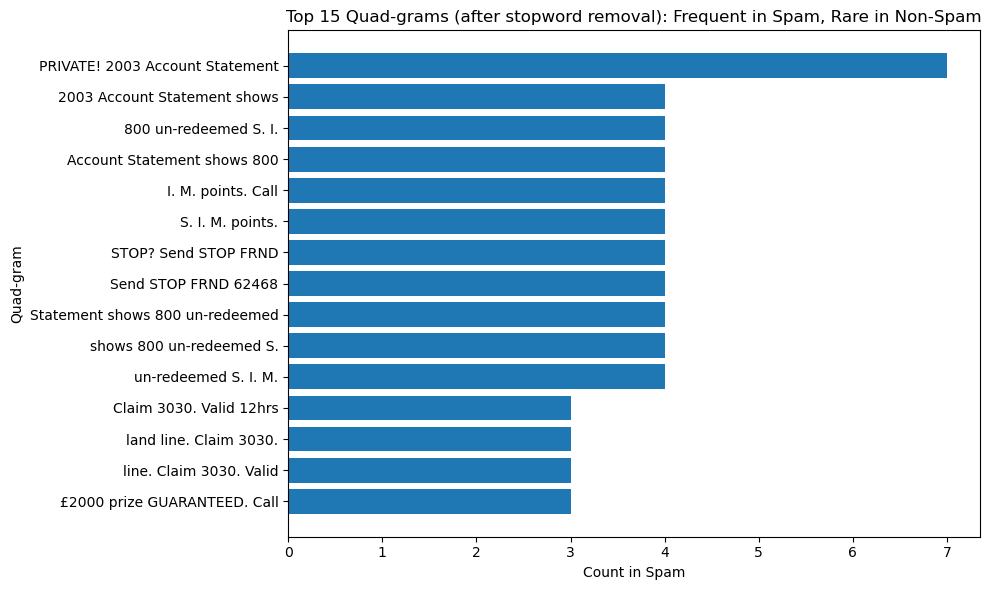

In [36]:
# remove stopwords and find top quad-grams frequent in Spam, rare in Non-Spam

# --- שלב 0: טעינת stopwords (NLTK) ---
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

# --- שלב 1: הסרת stopwords (פיצול לפי רווח בלבד) ---
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()  # פיצול לפי רווח בלבד
    tokens = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(tokens)

if "Message_no_stop" not in df.columns:
    df["Message_no_stop"] = df["Message_body"].apply(remove_stopwords)

# --- שלב 1.א: נרמול ערכי Label כדי לתפוס "Non-Spam" וגם "Non_Spam" ---
label_norm = (
    df["Label"].astype(str).str.lower()
      .str.replace("-", "", regex=False)
      .str.replace("_", "", regex=False)
)
# מסיכות בחירה
ham_mask  = label_norm.eq("nonspam")
spam_mask = label_norm.eq("spam")

# --- שלב 2: Tokenizer ששומר תווים מיוחדים ומפצל רק ברווח ---
def whitespace_tokenizer(text: str):
    if not isinstance(text, str):
        return []
    return re.findall(r"\S+", text)  # כל רצף לא-רווח הוא טוקן אחד

# --- שלב 3: CountVectorizer ל-QUAD-GRAMS (4-grams) על כל הדאטה (כדי לקבע vocab משותף) ---
vec = CountVectorizer(
    ngram_range=(4, 4),      # QUAD-GRAMS
    tokenizer=whitespace_tokenizer,
    token_pattern=None,      # מבטל regex ברירת מחדל
    lowercase=False,         # שנה ל-True אם תרצה לנרמל רישיות
    stop_words=None
)

texts_all = df["Message_no_stop"].fillna("").astype(str)
vec.fit(texts_all)

# חלוקה לתת-קבוצות
spam_texts = df.loc[spam_mask, "Message_no_stop"].fillna("").astype(str)
ham_texts  = df.loc[ham_mask,  "Message_no_stop"].fillna("").astype(str)

X_spam = vec.transform(spam_texts)
X_ham  = vec.transform(ham_texts)

# --- שלב 4: ספירת תדירויות ---
vocab = vec.get_feature_names_out()
spam_counts = X_spam.sum(axis=0).A1
ham_counts  = X_ham.sum(axis=0).A1

spam_df = pd.DataFrame({"ngram": vocab, "count_spam": spam_counts})
ham_df  = pd.DataFrame({"ngram": vocab, "count_ham": ham_counts})

# --- שלב 5: איחוד והשוואה (נפוץ ב-Spam ונדיר ב-Non-Spam) ---
merged = spam_df.merge(ham_df, on="ngram", how="left").fillna(0)
# יחס עם החלקה +1 כדי למנוע חלוקה ב-0
merged["spam_vs_ham_ratio"] = (merged["count_spam"] + 1) / (merged["count_ham"] + 1)

# דירוג: קודם לפי שכיחות ב-Spam, ואז לפי יחס עדיפות מול Ham
top15_spam_unique_quad = merged.sort_values(
    by=["count_spam", "spam_vs_ham_ratio"],
    ascending=[False, False]
).head(15)

print(top15_spam_unique_quad[["ngram", "count_spam", "count_ham", "spam_vs_ham_ratio"]])

# --- שלב 6: ויזואליזציה ---
plt.figure(figsize=(10, 6))
plt.barh(top15_spam_unique_quad["ngram"][::-1], top15_spam_unique_quad["count_spam"][::-1])
plt.title("Top 15 Quad-grams (after stopword removal): Frequent in Spam, Rare in Non-Spam")
plt.xlabel("Count in Spam")
plt.ylabel("Quad-gram")
plt.tight_layout()
plt.show()

In [ ]:
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED
# WE DONT NEED

In [38]:
# # נגדיר רשימת תווים מיוחדים לבדיקה
# special_chars = ["!", "?", "@", "#", "$", "%", "^", "&", "*", "…", ".", ",", ":", ";", "(", ")", "-", "_", "+", "=", "/"]

# # נוסיף עמודות לכל סימן מיוחד
# for char in special_chars:
#     col_name = f"char_{re.escape(char)}"
#     df[col_name] = df["Message_body"].apply(lambda x: x.count(char))

# # פונקציה שמחשבת הסתברות הופעת סימן מיוחד (ממוצע >0)
# def prob_char_in_class(dataframe, label, char):
#     subset = dataframe[dataframe["Label"] == label]
#     return (subset[f"char_{re.escape(char)}"]).mean() #> 0).mean()

# # נבנה טבלה מסכמת
# results = []
# for char in special_chars:
#     spam_prob = prob_char_in_class(df, "Spam", char)
#     ham_prob  = prob_char_in_class(df, "Non-Spam", char)
#     results.append({"char": char, "prob_in_spam": spam_prob, "prob_in_nonspam": ham_prob})

# results_df = pd.DataFrame(results)

# print(results_df)

In [39]:
# Quad-grams (4-grams)

top_quad = get_top_ngrams(df['Message_body'], ngram_range=(4,4), n=15)
quad_df = pd.DataFrame(top_quad, columns=["4-gram", "count"])

plt.figure(figsize=(10,5))
sns.barplot(x="count", y="4-gram", data=quad_df, palette="coolwarm")
plt.title("Top 15 Quad-grams in Dataset")
plt.show()

NameError: name 'get_top_ngrams' is not defined

           ngram  count_ham  count_spam  ham_vs_spam_ratio
0          lt gt         39         0.0               40.0
1   good morning          7         0.0                8.0
2      dont know          6         0.0                7.0
3        gud ni8          6         0.0                7.0
4       sorry ll          6         0.0                7.0
5       ll later          6         0.0                7.0
6       pls send          5         0.0                6.0
7         ok lor          5         0.0                6.0
8       wat time          5         0.0                6.0
9       good day          5         0.0                6.0
10     great day          4         0.0                5.0
11        ve got          4         0.0                5.0
12      don know          4         0.0                5.0
13    swt dreams          4         0.0                5.0
14      new year          3         0.0                4.0


C:\Users\david\AppData\Local\Temp\ipykernel_3068\3999339790.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_ham", y="ngram", data=top_bi_ham_unique, palette="Blues_r")


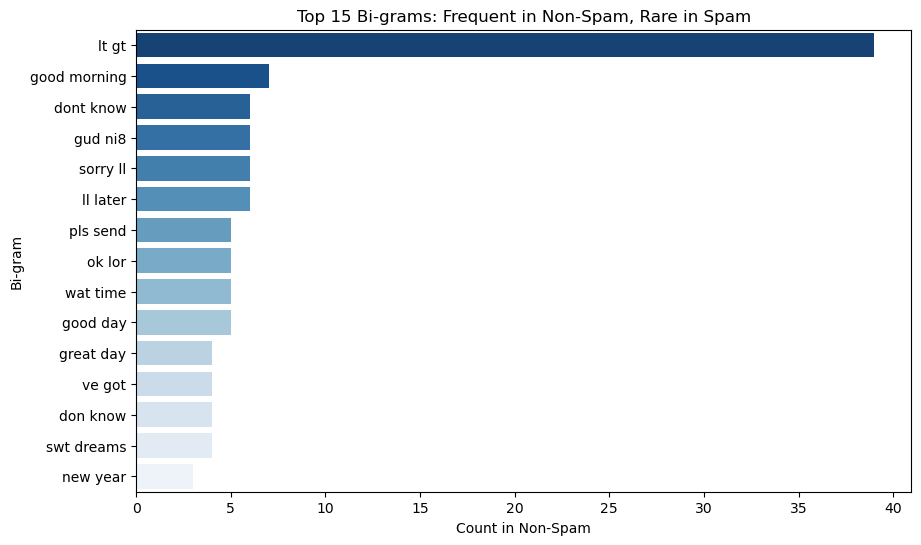

In [40]:
def get_ngram_counts(corpus, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    freqs = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return pd.DataFrame(freqs, columns=["ngram", "count"]).sort_values(by="count", ascending=False)

# ----------------------------
# ספירה בנפרד עבור Non-Spam ו-Spam
# ----------------------------
ham_ngrams  = get_ngram_counts(df[df['Label']=="Non-Spam"]["Message_body"], (2,2))
spam_ngrams = get_ngram_counts(df[df['Label']=="Spam"]["Message_body"], (2,2))

# איחוד לטבלה אחת
merged = pd.merge(ham_ngrams, spam_ngrams, on="ngram", how="left", suffixes=("_ham","_spam"))
merged = merged.fillna(0)  # אם bi-gram לא קיים ב-Spam נשים 0

# חישוב יחס (כמה יותר נפוץ ב-Ham לעומת Spam)
merged["ham_vs_spam_ratio"] = (merged["count_ham"] + 1) / (merged["count_spam"] + 1)

# מיון: הכי נפוץ ב-Ham והכי פחות ב-Spam
top_bi_ham_unique = merged.sort_values(by=["count_ham","ham_vs_spam_ratio"], ascending=[False,False]).head(15)

print(top_bi_ham_unique)

# ----------------------------
# ויזואליזציה
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x="count_ham", y="ngram", data=top_bi_ham_unique, palette="Blues_r")
plt.title("Top 15 Bi-grams: Frequent in Non-Spam, Rare in Spam")
plt.xlabel("Count in Non-Spam")
plt.ylabel("Bi-gram")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [44]:
# code example 

# 3.0 Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# 3.1 Load data (train/test files from the assignment)
# חשוב: אין לפצל מחדש – עובדים עם ה־train וה־test כפי שהם. 
# כאן נניח שקבצי Kaggle נשמרו בשמות SMS_train.csv / SMS_test.csv.
#df_raw = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")

df_train = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")
df_test  = pd.read_csv("datasets/SMS_test.csv", encoding="latin1")

TEXT_COL = "Message_body"       # שם העמודה אצלך
LABEL_COL = "Label"             # "Spam" / "Non-Spam"

# וידוא ערכים ב־Label
print(df_train[LABEL_COL].value_counts())

# 3.2 Metric: Binary F1 with main class = "Spam"
f1_spam = make_scorer(f1_score, pos_label="Spam")

# 3.3 Cross-Validation (5 folds stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3.4 Base pipeline: Vectorizer (placeholder) + Classifier (placeholder)
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression())
])

# 3.5 Parameter grid (כפל קרטזי של FE + מודלים + היפר־פרמטרים)
#   Feature Engineering ideas:
#   (A) TF-IDF מילים: uni/bi-grams, הסרת stopwords, min_df 
#   (B) TF-IDF תווים: char-level 3–5 n-grams (חזק ל־SMS)
#   Models:  LR, LinearSVC, MultinomialNB
param_grid = [
    # --- A) Word TF-IDF + 3 מודלים ---
    {
        "tfidf__analyzer": ["word"],
        "tfidf__ngram_range": [(1,1), (1,2)],
        "tfidf__stop_words": ["english"],
        "tfidf__min_df": [1, 2, 3],
        "clf": [LogisticRegression(max_iter=200, n_jobs=None, solver="liblinear")],
        "clf__C": [0.1, 1.0, 3.0],
        "clf__penalty": ["l2"]  # (l1/l2 – עם liblinear אפשרי, נשאיר l2 לבסיס)
    },
    {
        "tfidf__analyzer": ["word"],
        "tfidf__ngram_range": [(1,1), (1,2)],
        "tfidf__stop_words": ["english"],
        "tfidf__min_df": [1, 2, 3],
        "clf": [LinearSVC()],
        "clf__C": [0.5, 1.0, 2.0]
    },
    {
        "tfidf__analyzer": ["word"],
        "tfidf__ngram_range": [(1,1), (1,2)],
        "tfidf__stop_words": ["english"],
        "tfidf__min_df": [1, 2, 3],
        "clf": [MultinomialNB()],
        "clf__alpha": [0.1, 0.5, 1.0]
    },

    # --- B) Char TF-IDF + 3 מודלים ---
    {
        "tfidf__analyzer": ["char"],
        "tfidf__ngram_range": [(3,5)],         # char 3–5 n-grams
        "tfidf__min_df": [2, 3],               # מסנן רעשים/נדירים
        "clf": [LogisticRegression(max_iter=200, solver="liblinear")],
        "clf__C": [0.5, 1.0, 2.0],
        "clf__penalty": ["l2"]
    },
    {
        "tfidf__analyzer": ["char"],
        "tfidf__ngram_range": [(3,5)],
        "tfidf__min_df": [2, 3],
        "clf": [LinearSVC()],
        "clf__C": [0.5, 1.0, 2.0]
    },
    {
        "tfidf__analyzer": ["char"],
        "tfidf__ngram_range": [(3,5)],
        "tfidf__min_df": [2, 3],
        "clf": [MultinomialNB()],
        "clf__alpha": [0.1, 0.5, 1.0]
    },
]

# 3.6 GridSearchCV — מריץ את כל הפרמוטציות עם 5-fold CV על train
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=f1_spam,      # לפי הדרישה: F1 במחלקה המרכזית בבעיית בינארית
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=False           # בשלב זה רק ניסויים/טבלה; אימון סופי יהיה בחלק 4
)

X_train = df_train[TEXT_COL].astype(str).values
y_train = df_train[LABEL_COL].values

grid.fit(X_train, y_train)

# 3.7 טבלת כל הפרמוטציות + ציון ממוצע (F1) + סטיית תקן
cv_results = pd.DataFrame(grid.cv_results_)
cols_to_keep = [
    "mean_test_score", "std_test_score", "params", "rank_test_score"
]
results = cv_results[cols_to_keep].sort_values("mean_test_score", ascending=False).reset_index(drop=True)

print("Top rows of all permutations:\n", results.head(10))

# 3.8 שליפת הפרמוטציה המנצחת (לשימוש בחלק 4)
best_row = results.iloc[0]
best_params = best_row["params"]
best_score = best_row["mean_test_score"]
print("\nBest mean F1(Spam):", round(best_score, 4))
print("Best params:\n", best_params)

# (אופציונלי) שמירה ל־CSV כדי להגיש טבלת ניסויים מלאה
results.to_csv("part3_all_permutations_results.csv", index=False)
print("\nSaved: part3_all_permutations_results.csv")


Label
Non-Spam    835
Spam        122
Name: count, dtype: int64
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Top rows of all permutations:
    mean_test_score  std_test_score  \
0         0.912855        0.043213   
1         0.911001        0.039156   
2         0.897768        0.035934   
3         0.896350        0.034729   
4         0.893844        0.045559   
5         0.891724        0.030386   
6         0.889750        0.053024   
7         0.888765        0.039280   
8         0.888009        0.042079   
9         0.887697        0.052303   

                                              params  rank_test_score  
0  {'clf': MultinomialNB(), 'clf__alpha': 0.1, 't...                1  
1  {'clf': MultinomialNB(), 'clf__alpha': 0.1, 't...                2  
2  {'clf': MultinomialNB(), 'clf__alpha': 0.1, 't...                3  
3  {'clf': LinearSVC(), 'clf__C': 2.0, 'tfidf__an...                4  
4  {'clf': MultinomialNB(), 'clf__alpha': 0.1, 't...            

c:\Users\david\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [49]:
# algebrian probabability  of all the n-grams fron NB

import pandas as pd
import numpy as np
from joblib import load
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# === פרמטרים כלליים ===
TEXT_COL  = "Message_body"
LABEL_COL = "Label"

# === 1) טען את המודל אם כבר נשמר; אחרת אימון מהיר (רק אם צריך) ===
try:
    pipe_best: Pipeline = load("best_spam_model.joblib")
    print("Loaded saved model: best_spam_model.joblib")
except:
    print("No saved model found. Training a quick best model now...")
    import pandas as pd
    df_train = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")
    pipe_best = Pipeline([
        ("tfidf", TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=3)),
        ("clf", MultinomialNB(alpha=0.1)),
    ])
    pipe_best.fit(df_train[TEXT_COL].astype(str).values, df_train[LABEL_COL].values)

# === 2) שליפת שמות הפיצ'רים והלוג-סיכויים מה-NB ===
vec: TfidfVectorizer = pipe_best.named_steps["tfidf"]
nb : MultinomialNB    = pipe_best.named_steps["clf"]

feature_names = np.array(vec.get_feature_names_out())  # כל ה-char n-grams
classes = nb.classes_                                  # ['Non-Spam','Spam'] (לרוב)
# מציאת האינדקס של 'Spam' ו-'Non-Spam'
spam_idx = int(np.where(classes == "Spam")[0][0])
ham_idx  = int(np.where(classes == "Non-Spam")[0][0])

# feature_log_prob_.shape = [n_classes, n_features]
logprob_spam = nb.feature_log_prob_[spam_idx]
logprob_ham  = nb.feature_log_prob_[ham_idx]

# הפרש לוג-סיכויים: חיובי => נוטה ל-Spam, שלילי => נוטה ל-Non-Spam
logprob_diff = logprob_spam - logprob_ham

# === 3) Top n-grams הכי "ספאמיים" ו"הכי לא-ספאם" ===
TOP_K = 25

top_spam_idx = np.argsort(-logprob_diff)[:TOP_K]
top_ham_idx  = np.argsort(logprob_diff)[:TOP_K]  # הכי שלילי => הכי Non-Spam

top_spam_df = pd.DataFrame({
    "ngram": feature_names[top_spam_idx],
    "logP(Spam)": logprob_spam[top_spam_idx],
    "logP(Non-Spam)": logprob_ham[top_spam_idx],
    "logOdds(Spam-Ham)": logprob_diff[top_spam_idx]
})

top_ham_df = pd.DataFrame({
    "ngram": feature_names[top_ham_idx],
    "logP(Spam)": logprob_spam[top_ham_idx],
    "logP(Non-Spam)": logprob_ham[top_ham_idx],
    "logOdds(Spam-Ham)": logprob_diff[top_ham_idx]
})

print("\n=== Top spammy char n-grams ===")
print(top_spam_df.head(TOP_K))

print("\n=== Top non-spammy char n-grams ===")
print(top_ham_df.head(TOP_K))

# אופציונלי: שמירה ל-CSV להגשה
top_spam_df.to_csv("top_spammy_char_ngrams.csv", index=False)
top_ham_df.to_csv("top_nonspammy_char_ngrams.csv", index=False)
print("\nSaved CSVs: top_spammy_char_ngrams.csv , top_nonspammy_char_ngrams.csv")

No saved model found. Training a quick best model now...

=== Top spammy char n-grams ===
    ngram  logP(Spam)  logP(Non-Spam)  logOdds(Spam-Ham)
0      08   -7.351912      -11.555098           4.203186
1   all 0   -7.355080      -11.555098           4.200018
2    ll 0   -7.355080      -11.555098           4.200018
3     l 0   -7.355080      -11.555098           4.200018
4     087   -7.504806      -11.555098           4.050292
5     087   -7.585346      -11.555098           3.969752
6     000   -7.665178      -11.555098           3.889920
7     871   -7.692358      -11.555098           3.862740
8    0871   -7.718923      -11.555098           3.836175
9    0871   -7.751937      -11.555098           3.803161
10    090   -7.751992      -11.555098           3.803106
11     09   -7.820611      -11.555098           3.734487
12    090   -7.820611      -11.555098           3.734487
13  claim   -7.842541      -11.555098           3.712557
14   laim   -7.842541      -11.555098           3.71255

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [50]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from joblib import dump

# נשתמש באותם שמות עמודות כמו קודם
TEXT_COL = "Message_body"
LABEL_COL = "Label"

# טען שוב (או השתמש ב-df_train שכבר בזיכרון)
df_train = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")

# הפרמטרים המנצחים מה-GridSearch (כפי שהודפסו אצלך)
best_params = {
    "tfidf__analyzer": "char",
    "tfidf__ngram_range": (3, 5),
    "tfidf__min_df": 3,
    "clf": MultinomialNB(),
    "clf__alpha": 0.1,
}

# בונים pipeline זהה ומעדכנים פרמטרים
pipe_best = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
pipe_best.set_params(**best_params)

# אימון על כל ה-train (כולו, ללא פיצול)
X_tr = df_train[TEXT_COL].astype(str).values
y_tr = df_train[LABEL_COL].values

pipe_best.fit(X_tr, y_tr)

# נשמור את המודל לשימוש בחלק 5
dump(pipe_best, "best_spam_model.joblib")
print("Model saved to best_spam_model.joblib")

Model saved to best_spam_model.joblib


## Part 5 - Apply on test and show model performance estimation

In [52]:
import pandas as pd
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support, accuracy_score

TEXT_COL = "Message_body"
LABEL_COL = "Label"

# טען test
df_test = pd.read_csv("datasets/SMS_train.csv", encoding="latin1")

# טען את המודל השמור
pipe_best = load("best_spam_model.joblib")

# חיזוי
y_true = df_test[LABEL_COL].values
y_pred = pipe_best.predict(df_test[TEXT_COL].astype(str).values)

# מדדים
acc  = accuracy_score(y_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=["Spam","Non-Spam"], average=None)
f1_spam = f1_score(y_true, y_pred, pos_label="Spam")

print("Accuracy:", round(acc, 4))
print("F1(Spam):", round(f1_spam, 4))
print("\nPer-class (labels in order ['Spam','Non-Spam']):")
print("Precision:", [round(x,4) for x in prec])
print("Recall   :", [round(x,4) for x in rec])
print("F1       :", [round(x,4) for x in f1])

print("\nConfusion matrix [rows=true, cols=pred]:")
print(confusion_matrix(y_true, y_pred, labels=["Spam","Non-Spam"]))

print("\nClassification report:")
print(classification_report(y_true, y_pred, labels=["Spam","Non-Spam"]))

# הצגת 5 תחזיות ראשונות
preview = df_test[[TEXT_COL, LABEL_COL]].copy()
preview["pred"] = y_pred
print("\nSample predictions:")
print(preview.head(5))

Accuracy: 0.9948
F1(Spam): 0.9794

Per-class (labels in order ['Spam','Non-Spam']):
Precision: [0.9835, 0.9964]
Recall   : [0.9754, 0.9976]
F1       : [0.9794, 0.997]

Confusion matrix [rows=true, cols=pred]:
[[119   3]
 [  2 833]]

Classification report:
              precision    recall  f1-score   support

        Spam       0.98      0.98      0.98       122
    Non-Spam       1.00      1.00      1.00       835

    accuracy                           0.99       957
   macro avg       0.99      0.99      0.99       957
weighted avg       0.99      0.99      0.99       957


Sample predictions:
                                        Message_body     Label      pred
0                         Rofl. Its true to its name  Non-Spam  Non-Spam
1  The guy did some bitching but I acted like i'd...  Non-Spam  Non-Spam
2  Pity, * was in mood for that. So...any other s...  Non-Spam  Non-Spam
3               Will ü b going to esplanade fr home?  Non-Spam  Non-Spam
4  This is the 2nd time we have